In [1]:
import tensorflow
from keras import layers, models
# ()

Using TensorFlow backend.


In [2]:
import numpy as np
from keras import datasets
from keras.utils import np_utils


# SVM

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import cross_validate

In [4]:
digits = datasets.load_digits()
print('Image Data Shap ', digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shap  (1797, 64)
Label Data Shape (1797,)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [6]:
sgd_clf = SGDClassifier(max_iter=100)
sgd_clf.fit(x_train, y_train)

#prediction
y_pred_sgd = sgd_clf.predict(x_test)

#Accuracy
acc_sgd = accuracy_score(y_test, y_pred_sgd)
print ("stochastic gradient descent accuracy: ",acc_sgd)

# validation
cross_val=cross_validate(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")
print("Cross Validation Value:",cross_val)

stochastic gradient descent accuracy:  0.9288888888888889
Cross Validation Value: {'fit_time': array([0.11469173, 0.12167692, 0.11369348]), 'score_time': array([0.00099707, 0.00100493, 0.00099778]), 'test_score': array([0.93362832, 0.94877506, 0.93497758]), 'train_score': array([0.98659218, 0.98775056, 0.98224195])}


# 단순 뉴럴넷

In [5]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [6]:
def ANN_Seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, ) ))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


In [7]:
def Data_func():
    (X_train,y_train),(X_test,y_test) = mnist.load_data()
    
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    L,W,H = X_train.shape
    X_train = X_train.reshape(-1,W*H)
    X_test = X_test.reshape(-1,W*H)
    
    X_train = X_train / 255.0
    X_test = X_test /255.0
    
    return (X_train,y_train),(X_test,y_test)

In [8]:
print(X_train.shape,X_train.dtype)

(60000, 28, 28) uint8


In [14]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [28]:
import matplotlib.pyplot as plt

In [29]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','test'],loc=0)
    

In [30]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','test'],loc=0)
    

In [31]:
def main():
    Nin = 784
    Nh=100
    number_of_class=10
    Nout = number_of_class
    
    model = ANN_Seq_func(Nin , Nh, Nout)
    (X_train, y_train), (X_test,y_test) = Data_func()
    
    history = model.fit(X_train,y_train, epochs=5,
                       batch_size=100,validation_split=0.2 )
    performance_test = model.evaluate(X_test, y_test,batch_size=100)
    print('Test loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
    

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 48us/step - loss: 0.3968 - acc: 0.8918 - val_loss: 0.2049 - val_acc: 0.9428
Epoch 2/5
48000/48000 [==============================] - 2s 33us/step - loss: 0.1795 - acc: 0.9489 - val_loss: 0.1545 - val_acc: 0.9571
Epoch 3/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.1311 - acc: 0.9625 - val_loss: 0.1317 - val_acc: 0.9607
Epoch 4/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.1032 - acc: 0.9702 - val_loss: 0.1152 - val_acc: 0.9653
Epoch 5/5
10000/10000 [==============================] - 0s 11us/step
Test loss and Accuracy -> [0.09676604638923891, 0.9718000048398971]


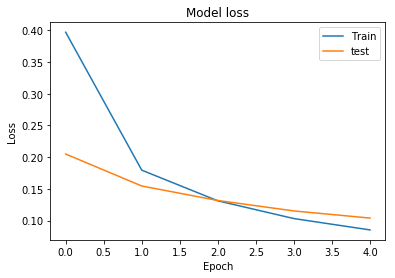

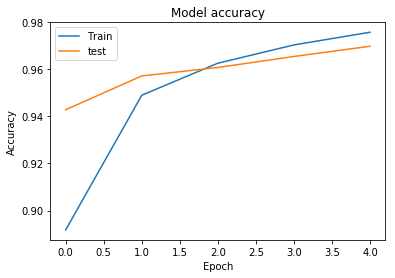

In [32]:
main()

# 분류 DNN

In [33]:
Nin = 784
Nh_l =[100,50]
number_of_class =10
Nout = number_of_class

In [34]:
def DNN_Seq_func(Nin, Nh_l, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin, ) ,name='Hidden-1'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(Nh_l[1],activation='relu', name='Hidden-2'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


In [40]:
def Data_func():
    (X_train,y_train),(X_test,y_test) = mnist.load_data()
    
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    L,W,H = X_train.shape
    X_train = X_train.reshape(-1,W*H)
    X_test = X_test.reshape(-1,W*H)
    
    X_train = X_train / 255.0
    X_test = X_test /255.0
    
    return (X_train,y_train),(X_test,y_test)

# 데이터 준비

In [41]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','test'],loc=0)
    

In [42]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','test'],loc=0)
    

In [43]:
def main():

    model = DNN_Seq_func(Nin , Nh_l, Nout)
    (X_train, y_train), (X_test,y_test) = Data_func()
    
    history = model.fit(X_train,y_train, epochs=5,
                       batch_size=100,validation_split=0.2 )
    performance_test = model.evaluate(X_test, y_test,batch_size=100)
    print('Test loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 42us/step - loss: 0.5317 - acc: 0.8391 - val_loss: 0.1928 - val_acc: 0.9438
Epoch 2/5
48000/48000 [==============================] - 2s 35us/step - loss: 0.2465 - acc: 0.9283 - val_loss: 0.1408 - val_acc: 0.9580
Epoch 3/5
48000/48000 [==============================] - 2s 35us/step - loss: 0.1906 - acc: 0.9443 - val_loss: 0.1212 - val_acc: 0.9641
Epoch 4/5
48000/48000 [==============================] - 2s 34us/step - loss: 0.1566 - acc: 0.9529 - val_loss: 0.1084 - val_acc: 0.9668
Epoch 5/5
10000/10000 [==============================] - 0s 14us/step
Test loss and Accuracy -> [0.09830263311130694, 0.9702000063657761]


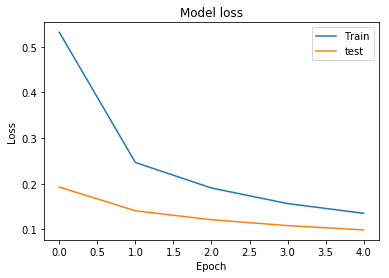

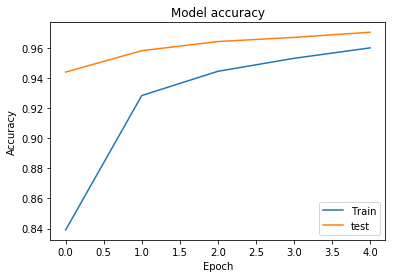

In [44]:
main()  # 계층이 2개가 된 모델

# 분류 CNN 모델링

In [52]:
import keras

In [53]:
from keras import models, layers
from keras import backend

In [54]:
num_classes =10
batch_size =128
epochs =10

In [55]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape) )
        self.add(layers.Conv2D(64,(3,3),activation='relu'))
        self.add(layers.MaxPool2D(pool_size=(2,2)))
        self.add(layers.Dropout(0.25))
                 
        self.add(layers.Flatten())
        self.add(layers.Dense(128,activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(number_of_class,activation='softmax'))
                 
        self.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop',
                    metrics=['accuracy'])
                 

In [56]:
from keras import datasets

In [57]:
x_train.shape[1:]

(64,)

In [58]:
img_cols

NameError: name 'img_cols' is not defined

In [59]:
class DATA():  # 전처리 코드
    def __init__(self):
        
        (x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        # 흑백이미지의 채널 정보 존재
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
            x_test  = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
            input_shape = (1,img_rows,img_cols)  #  L,C,W,H모양 만들어주기
        else:
            x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
            x_test  = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
            input_shape = (img_rows,img_cols,1)  # L,W,H,C모양 만들어주기

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, 10)  # hard coding 
        y_test = keras.utils.to_categorical(y_test,10)
        
        self.input_shape = input_shape
        self.x_train, self.y_train =x_train,y_train
        self.x_test, self.y_test = x_test,y_test

In [60]:
def main():
    data=DATA()
    model = CNN(data.input_shape , num_classes)
    
    history = model.fit(data.x_train,data.y_train,
                       batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.2
                       )
    
    score = model.evaluate(data.x_test,data.y_test)
    print()
    print('test loss:',score[0])
    print('test accuracy:', score[1])
    
    plot_acc(history)
    plt.show()

In [61]:
plt.show()

In [ ]:
main()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 118s 2ms/step - loss: 0.2554 - acc: 0.9219 - val_loss: 0.0659 - val_acc: 0.9800
Epoch 2/10
28416/48000 [================>.............] - ETA: 44s - loss: 0.0986 - acc: 0.9710

# 컬러 이미지 분류

In [45]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [46]:
def Data_fuc():
    (x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
    
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    L,W,H,C= x_train.shape
    x_train = x_train.reshape(-1,W*H*C)
    x_test = x_test.reshape(-1,W*H*C)
    
    x_train = x_train / 255.0
    x_test = x_test /255.0
    
    return (x_train,y_train),(x_test,y_test)
    print(X_train.shape)
# 데이터 셋 확인
    

In [47]:
def DNN(Nin,Nh_l, Pd_l, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin, ) ,name='Hidden-1'))
    model.add(layers.Dropout(Pd_l[0]))
    
    model.add(layers.Dense(Nh_l[1],activation='relu', name='Hidden-2'))
    model.add(layers.Dropout(Pd_l[1]))
    
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


In [48]:
# 결과값은 plot_loss와 plot_acc 함수로 계산함

In [49]:
Nh_l=[100,50]
Pd_l=[0.5,0.5]
number_of_class =10
Nout = number_of_class

In [50]:
def main():
    
    model =DNN(Nin, Nh_l,Pd_l, Nout)
    (x_train, y_train),(x_test,y_test) = Data_func()
    
    history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)
    
    performance_test = model.evaluate(x_test, y_test ,batch_size=100)
    print('Test Loss -> ',performance_test)
    
    plot_acc(history)
    plt.show()

In [51]:
main()

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 2s - loss: 0.8842 - acc: 0.7164 - val_loss: 0.2698 - val_acc: 0.9265
Epoch 2/100
 - 2s - loss: 0.4650 - acc: 0.8682 - val_loss: 0.2071 - val_acc: 0.9413
Epoch 3/100
 - 2s - loss: 0.3788 - acc: 0.8919 - val_loss: 0.1772 - val_acc: 0.9505
Epoch 4/100
 - 2s - loss: 0.3308 - acc: 0.9075 - val_loss: 0.1603 - val_acc: 0.9573
Epoch 5/100
 - 2s - loss: 0.3034 - acc: 0.9161 - val_loss: 0.1497 - val_acc: 0.9595
Epoch 6/100
 - 2s - loss: 0.2817 - acc: 0.9217 - val_loss: 0.1389 - val_acc: 0.9612
Epoch 7/100
 - 2s - loss: 0.2629 - acc: 0.9258 - val_loss: 0.1372 - val_acc: 0.9625
Epoch 8/100
 - 2s - loss: 0.2513 - acc: 0.9298 - val_loss: 0.1302 - val_acc: 0.9646
Epoch 9/100
 - 2s - loss: 0.2472 - acc: 0.9310 - val_loss: 0.1264 - val_acc: 0.9653
Epoch 10/100
 - 2s - loss: 0.2293 - acc: 0.9351 - val_loss: 0.1204 - val_acc: 0.9669
Epoch 11/100
 - 2s - loss: 0.2294 - acc: 0.9355 - val_loss: 0.1228 - val_acc: 0.9659
Epoch 12/100
 - 2s - los

KeyboardInterrupt: 

# RNN code test , 영화 평점정보 예측(긍부정 이진값=sigmoid)

In [196]:
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras import layers, models

In [197]:
class Data:
    def __init__(self, max_features=20000, maxlen=80):
        (x_train, y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
        x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
        x_test = sequence.pad_sequences(x_test,maxlen=maxlen)
        
        self.x_train,self.y_train = x_train,y_train
        self.x_test,self.y_test = x_test,y_test

In [205]:
class RNN_LSTM(models.Model):
    def __init__(self, max_features, maxlen):
        model= models.Sequential()
        model.add(layers.Embedding(max_features,128))
        model.add(layers.LSTM(128, dropout=0.2,recurrent_dropout=0.2))
        model.add(layers.Dense(1,activation='sigmoid'))
        
        #x = layers.Input((maxlen,))
        #h = layers.Embedding(max_features,128)(x)
        #h = layers.LSTM(128,droupout=0.2,recurrent_dropout=0.2)(h)
        #y = layers.Dense(1,activation='sigmoid')(h)
        #super().__init__(x,y)
        
        model.compile(loss='binary_crossentropy',optimizer='adam',meterics=['accuracy'])
        

In [219]:
class Machine():
    def __init__(self,max_features=20000, maxlen=80):
        self.data = Data(max_features,maxlen)
        self.model =RNN_LSTM(max_features,maxlen)
         
    def run(self, epochs=3, batch_size=32):
        
        data=self.data
        model=self.model
        print('Training stage')
        print('==============')
        
        model.fit(data.x_train,data.y_train, batch_size = batch_size, epochs= epochs,validation_data=(data.x_train,data.y_train))
        
        score, acc = model.evaluate(data.x_test,data.y_test,batch_size=batch_size)
        print('test performance',format(acc,score))
    
def main():
    m=Machine()
    m.run
        
        

In [220]:
main()

In [ ]:
## 원래코드 

In [221]:
from keras.preprocessing import sequence

from keras.datasets import imdb

from keras import layers, models





class Data:

    def __init__(self, max_features=20000, maxlen=80):

        (x_train, y_train), (x_test, y_test) = imdb.load_data(

            num_words=max_features)

        x_train = sequence.pad_sequences(x_train, maxlen=maxlen)

        x_test = sequence.pad_sequences(x_test, maxlen=maxlen)



        self.x_train, self.y_train = x_train, y_train

        self.x_test, self.y_test = x_test, y_test





class RNN_LSTM(models.Model):

    def __init__(self, max_features, maxlen):

        x = layers.Input((maxlen,))

        h = layers.Embedding(max_features, 128)(x)

        h = layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)(h)

        y = layers.Dense(1, activation='sigmoid')(h)

        super().__init__(x, y)



        # try using different optimizers and different optimizer configs

        self.compile(loss='binary_crossentropy',

                     optimizer='adam', metrics=['accuracy'])





class Machine:

    def __init__(self,

                 max_features=20000,

                 maxlen=80):

        self.data = Data(max_features, maxlen)

        self.model = RNN_LSTM(max_features, maxlen)



    def run(self, epochs=3, batch_size=32):

        data = self.data

        model = self.model

        print('Training stage')

        print('==============')

        model.fit(data.x_train, data.y_train,

                  batch_size=batch_size,

                  epochs=epochs,

                  validation_data=(data.x_test, data.y_test))



        score, acc = model.evaluate(data.x_test, data.y_test,

                                    batch_size=batch_size)

        print('Test performance: accuracy={0}, loss={1}'.format(acc, score))





def main():

    m = Machine()

    m.run()





if __name__ == '__main__':

    main()

Training stage
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 105s 4ms/step - loss: 0.4619 - acc: 0.7813 - val_loss: 0.3957 - val_acc: 0.8290
Epoch 2/3
25000/25000 [==============================] - 104s 4ms/step - loss: 0.3008 - acc: 0.8762 - val_loss: 0.3739 - val_acc: 0.8303
Epoch 3/3
25000/25000 [==============================] - 16s 642us/step
Test performance: accuracy=0.83008, loss=0.4081357351398468


# AE 모델링

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 55s 1ms/step - loss: 0.2165 - acc: 0.7957 - val_loss: 0.1452 - val_acc: 0.8072
Epoch 2/3
48000/48000 [==============================] - 54s 1ms/step - loss: 0.1325 - acc: 0.8055 - val_loss: 0.1247 - val_acc: 0.8116
Epoch 3/3
48000/48000 [==============================] - 54s 1ms/step - loss: 0.1195 - acc: 0.8084 - val_loss: 0.1161 - val_acc: 0.8075


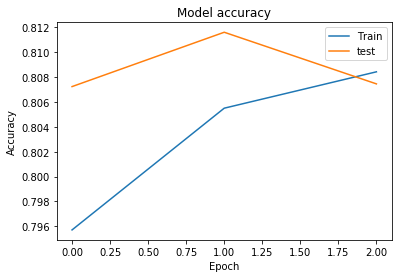

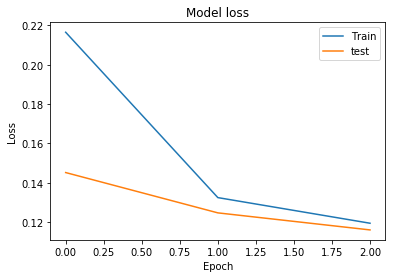

(10000, 28, 28, 1) (10000, 28, 28, 1)


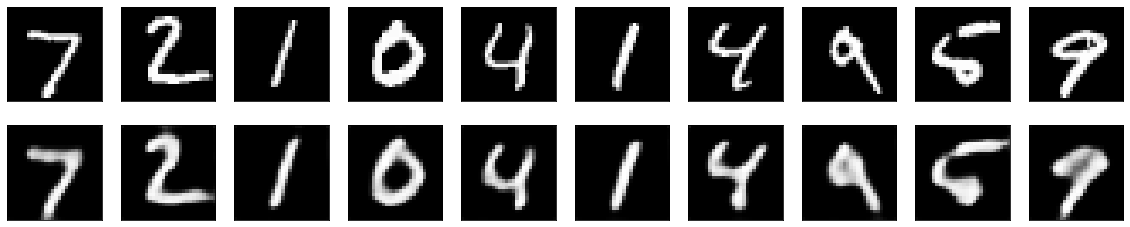

In [238]:
from keras import layers, models





def Conv2D(filters, kernel_size, padding='same', activation='relu'):

    return layers.Conv2D(filters, kernel_size, padding=padding, activation=activation)





class AE(models.Model):

    def __init__(self, org_shape=(1, 28, 28)):

        # Input

        original = layers.Input(shape=org_shape)



        # encoding-1

        x = Conv2D(4, (3, 3))(original)

        x = layers.MaxPooling2D((2, 2), padding='same')(x)



        # encoding-2

        x = Conv2D(8, (3, 3))(x)

        x = layers.MaxPooling2D((2, 2), padding='same')(x)



        # encoding-3: encoding output: 7x7 pixels

        z = Conv2D(1, (7, 7))(x)



        # decoding-1

        y = Conv2D(16, (3, 3))(z)

        y = layers.UpSampling2D((2, 2))(y)



        # decoding-2

        y = Conv2D(8, (3, 3))(y)

        y = layers.UpSampling2D((2, 2))(y)



        # decoding-3

        y = Conv2D(4, (3, 3))(y)



        # decoding & Output

        decoded = Conv2D(1, (3, 3), activation='sigmoid')(y)



        super().__init__(original, decoded)

        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])



###########################

# AE 결과 시각화

###########################

from keras import backend 





def show_ae(autoencoder, data):

    x_test = data.x_test

    decoded_imgs = autoencoder.predict(x_test)

    print(decoded_imgs.shape, data.x_test.shape)



    if backend.image_data_format() == 'channels_first':

        N, n_ch, n_i, n_j = x_test.shape

    else:

        N, n_i, n_j, n_ch = x_test.shape



    x_test = x_test.reshape(N, n_i, n_j)

    decoded_imgs = decoded_imgs.reshape(decoded_imgs.shape[0], n_i, n_j)

    

    n = 10

    plt.figure(figsize=(20, 4))

    for i in range(n):



        ax = plt.subplot(2, n, i + 1)

        plt.imshow(x_test[i], cmap='gray')

        # plt.gray()

        ax.get_xaxis().set_visible(False)

        ax.get_yaxis().set_visible(False)



        ax = plt.subplot(2, n, i + 1 + n)

        plt.imshow(decoded_imgs[i], cmap='gray')

        # plt.gray()

        ax.get_xaxis().set_visible(False)

        ax.get_yaxis().set_visible(False)



    plt.show()

    



###########################

# 학습 및 확인

###########################

def main(epochs=3, batch_size=128):

    data = DATA()

    autoencoder = AE(data.input_shape)



    history = autoencoder.fit(data.x_train, data.x_train,

                              epochs=epochs,

                              batch_size=batch_size,

                              shuffle=True,

                              validation_split=0.2)



    plot_acc(history)

    plt.show()

    plot_loss(history)

    plt.show()



    show_ae(autoencoder, data)

    plt.show()





if __name__ == '__main__':

    main()
    
    
# 화소를 올리면 acc가 올라가지 않을까 생각을 함

In [1]:
print('bold')


bold


#  전처리 시도

In [4]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt

In [73]:
img = cv2.imread('./himawari8_ahi_color_ch09_ko020ps_201507030100.png')

In [6]:
print(img.size)
print(img.dtype)
print(img.shape[0],img.shape[1],img.shape[2])
# 이미지 속성

2430000
uint8
900 900 3


In [7]:
print(img[899,0,2])

213


In [8]:
print(img[899,320])

[227  28   0]


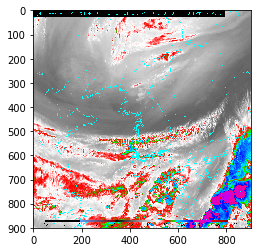

In [9]:
plt.imshow(img)

In [7]:
# 여기서 좌표값을 주어서 채널만 분리해서 그 채널만 분석한다
# 일사량 보정은 지표면 즉, csv에서 수정할 수 밖에


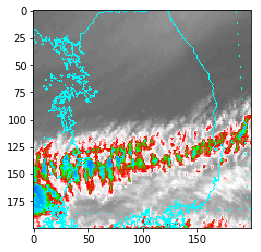

In [55]:
cutting_img=img[400:600, 400:600]
plt.imshow(cutting_img)

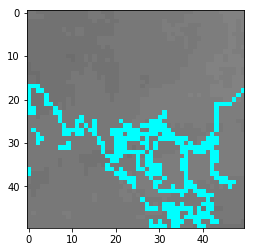

In [11]:
cutting_img2=img[400:450, 400:450]
plt.imshow(cutting_img2)

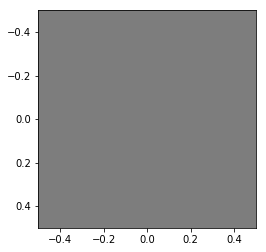

In [12]:
cutting_img=img[432:433, 441:442]
plt.imshow(cutting_img)
# x좌표 441?
# y좌표 432

In [19]:
print(img[432,441])

[125 125 125]


In [49]:
img[432,441]=[255,0,0]
print(img[432,441])  #해당점을 찾기 위해서 색상변경

[255   0   0]


uint8


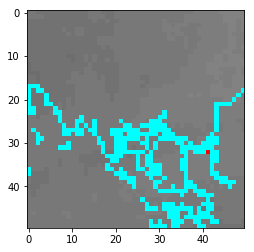

In [51]:
plt.imshow(cutting_img2) # 기준점을 찾음
print(img.dtype)

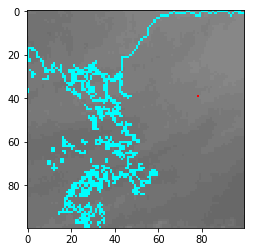

In [76]:
cutting_img3 = cutting_img=img[400:500, 400:500]  # 기준값이 잘보임
plt.imshow(cutting_img3)

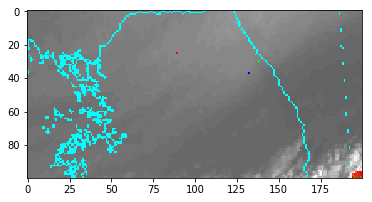

In [105]:
 img = cv2.imread('./himawari8_ahi_color_ch09_ko020ps_201507030100.png')
img[437,532]=[0,0,255]  # 대관령
img[425,489]=[255,0,0]  # 춘천
img[430,538]=[0,255,0]  # 강릉
cutting_img4 = cutting_img=img[400:500, 400:600]
plt.imshow(cutting_img4)  # 완성!!

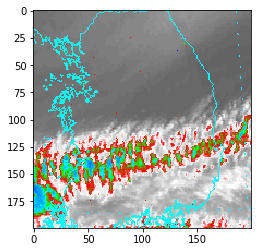

In [108]:
# 각 좌표값에서 수치 풀러와서 저장하기
img[437,532]=[0,0,255]  # 대관령
img[425,489]=[255,0,0]  # 춘천
img[430,538]=[0,255,0]  # 강릉
img[433,540]=[255,0,0]
img[443,455]=[255,0,0]
img[448,440]=[255,0,0]
img[456,498]=[255,0,0]
img[459,456]=[255,0,0]
img[486,435]=[255,0,0]
img[494,476]=[255,0,0]
img[508,473]=[255,0,0]
img[517,501]=[255,0,0]
img[497,532]=[255,0,0]
img[527,561]=[255,0,0]
img[535,529]=[255,0,0]
img[537,462]=[255,0,0]
img[574,452]=[255,0,0]
img[593,430]=[255,0,0]
img[578,546]=[255,0,0]
img[593,430]=[255,0,0]
img[600,389]=[255,0,0]
img[564,439]=[255,0,0]
img[664,439]=[255,0,0]
img[677,420]=[255,0,0]
img[574,503]=[255,0,0]
img[560,444]
img[571,540]
img[563,463]
img[571,530]
img[567,546]
img[596,466]
img[604,447]
img[566,513]
img[555,490]
img[586,487]
img[505,547]
cutting_img4 = cutting_img=img[400:600, 400:600]
plt.imshow(cutting_img4)  # 완성!!